In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [28]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")

In [29]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [31]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df["value"] >= df["value"].quantile(0.025)) &
        (df["value"] <= df["value"].quantile(0.975))]


In [32]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


### Figure 1
![Alt text](examples/Figure_1.png)

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

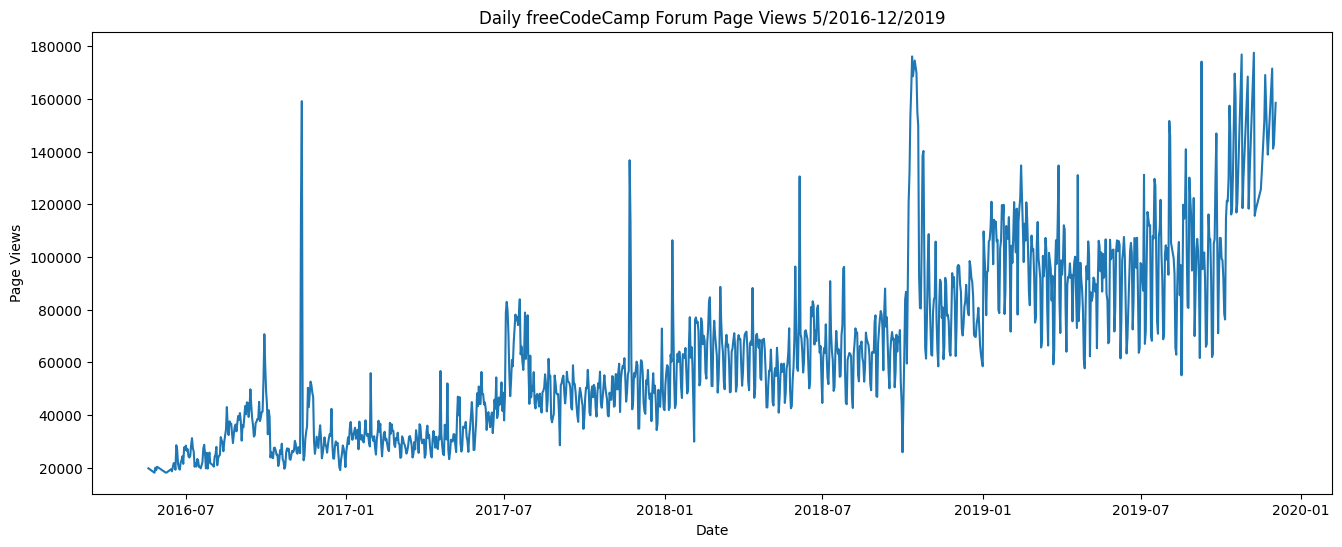

In [120]:
# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
# The title should be ```Daily freeCodeCamp Forum Page Views 5/2016-12/2019```. 
# The label on the x axis should be ```Date``` and the label on the y axis should be ```Page Views```.

# fig = plt.plot(df.index, df["value"],color = 'r')
# plt.xlabel("Date")
# plt.ylabel("Page Views")
# plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

fig, ax = plt.subplots(figsize=(16, 6))
ax = sns.lineplot(data=df, x="date", y="value")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")


### Figure 2
![Alt text](examples/Figure_2.png)

In [95]:
# df_bar = df.copy()
# df_bar['Year'] = pd.DatetimeIndex(df_bar.index).year
# df_bar['Month'] = pd.DatetimeIndex(df_bar.index).month

# df_bar = df_bar.groupby(['Year', 'Month'])['value'].mean()
# df_bar = df_bar.unstack()
# df_bar

In [93]:
# Copy and modify data for monthly bar plot
df_bar = df.copy().reset_index()
# df_bar = df_bar.groupby([df_bar["date"].dt.year, df_bar["date"].dt.month])
df_bar["year"] = df_bar["date"].dt.year
df_bar["month"] = df_bar["date"].dt.month
df_bar = df_bar.groupby(["year", "month"]).mean()
df_bar = df_bar.unstack(level=-1)
df_bar

value                                                           \
month             1              2             3             4             5    
year                                                                            
2016             NaN            NaN           NaN           NaN  19432.400000   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

                                                                               \
month            6             7              8             9              10   
year                                                                            
2016   21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017   43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018   70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019   90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

                                     
month             11             12  
year                                 
2016    40448.633333   27832.419355  
2017    57701.566667   48420.580645  
2018    78688.333333   80047.483871  
2019   143166.428571  150733.500000

In [94]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
# It should show average daily page views for each month grouped by year. 
# The legend should show month labels and have a title of``` Months```. On the chart, the label on the x axis should be ```Years``` and the label on the y axis should be ```Average Page Views```.

month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December']



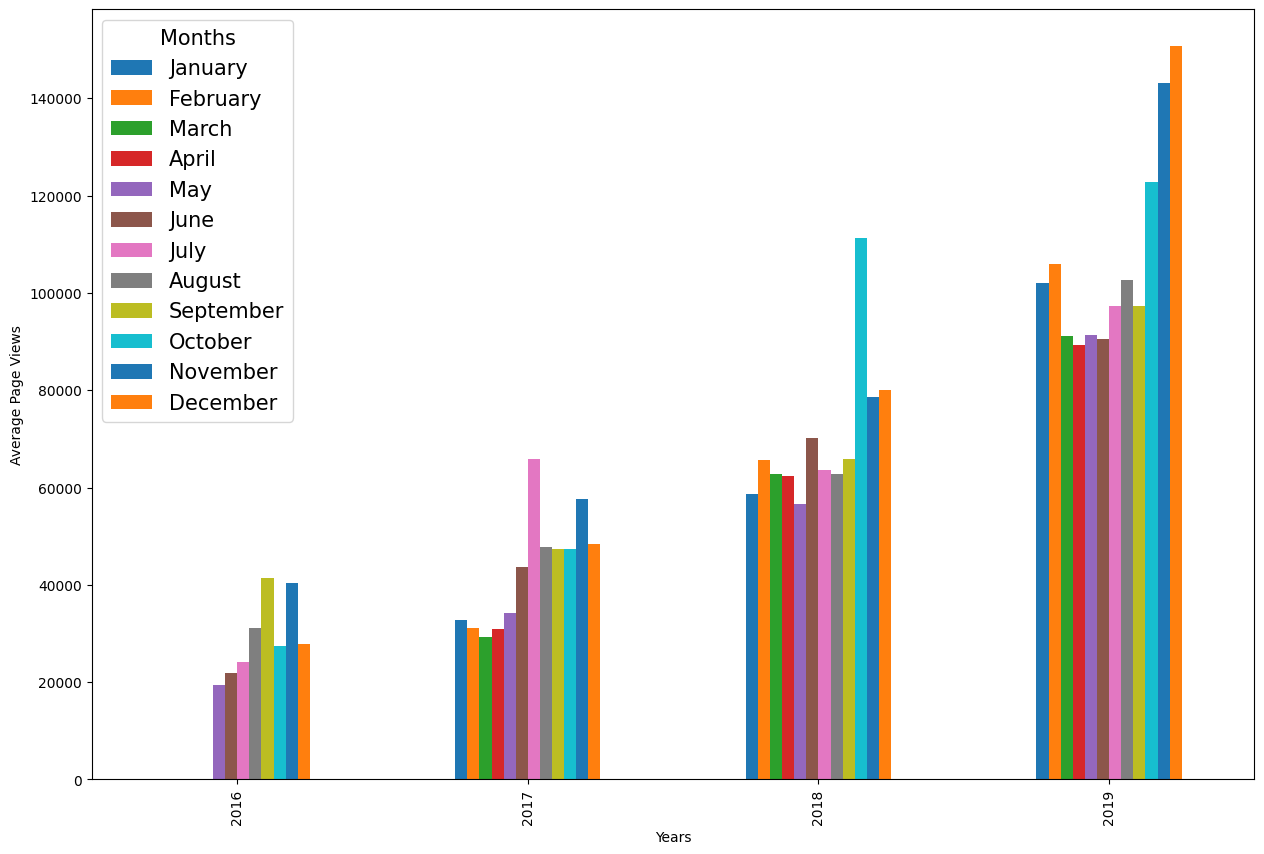

In [91]:
fig = df_bar.plot(kind= 'bar', figsize = (15,10)).figure
plt.xlabel('Years')
plt.ylabel('Average Page Views')
lg = plt.legend(title= 'Months', fontsize = 15, labels = month_names)
title = lg.get_title()
title.set_fontsize(15)

### Figure 3
![Alt text](examples/Figure_3.png)

In [100]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


Text(0, 0.5, 'Page Views')

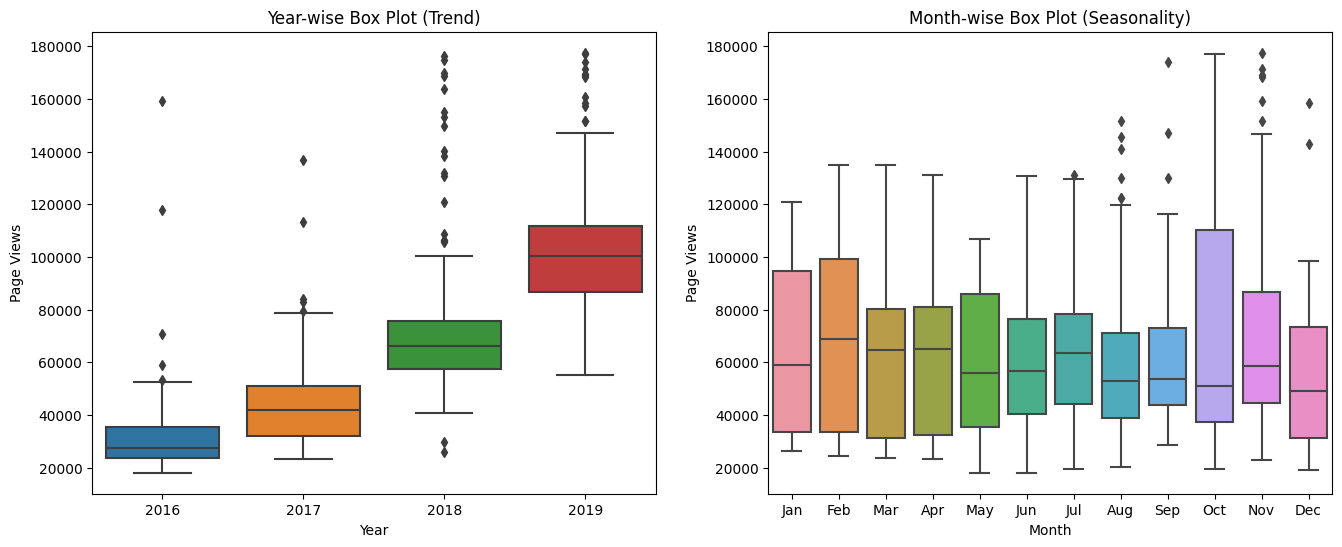

In [121]:
# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". 
# These box plots should show how the values are distributed within a given year or month and how it compares over time. 
# The title of the first chart should be ```Year-wise Box Plot (Trend)``` and the title of the second chart should be ```Month-wise Box Plot (Seasonality)```. 
# Make sure the month labels on bottom start at ```Jan``` and the x and y axis are labeled correctly.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# First plot
# ax1 = sns.boxplot(x = "year", y = "value", data = df_box)
sns.boxplot(ax=ax1, data=df_box, x="year", y="value")
ax1.set_title("Year-wise Box Plot (Trend)")
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
# ax1.set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")

# Second plot
# ax2 = sns.boxplot(x = "month", y = "value", data = df_box)
sns.boxplot(ax=ax2, data=df_box, x="month", y="value",order=month_names)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')



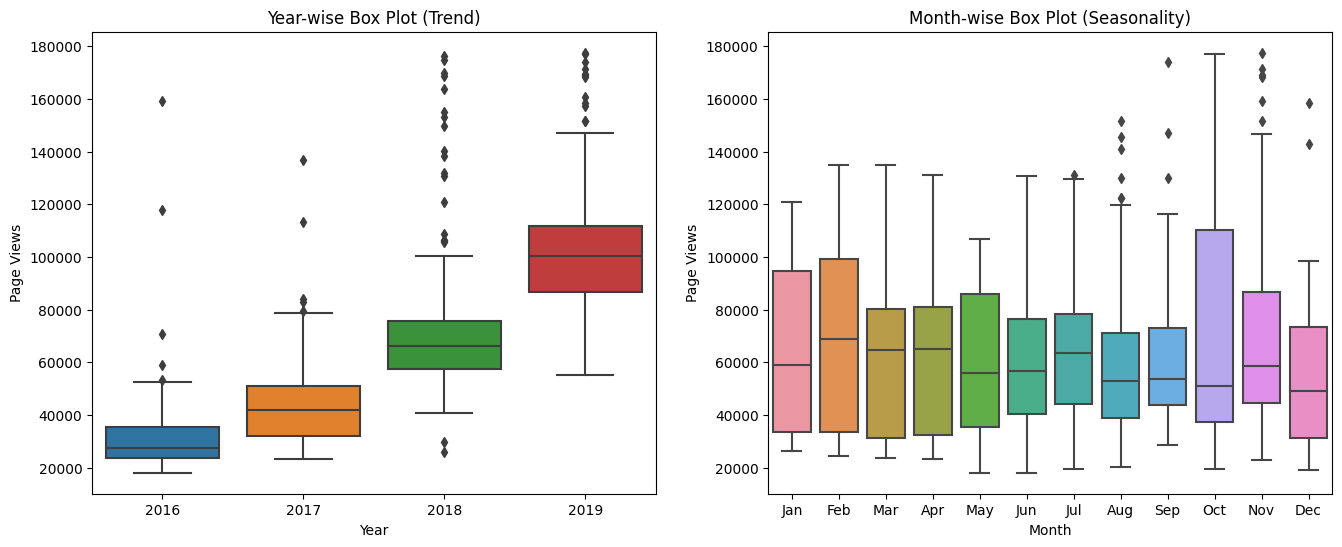

In [122]:
fig